**UTS Natural Language Processing**

* **Nama   : Muhamad Taufiq Riza**
* **NIM    : 402019611021**
* **Materi : Klasifikasi Text Menggunakan Metode Supoert Vector Mechine**

**Import Library**

In [8]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re,string,unicodedata
from string import punctuation

**Load Dataset**

In [9]:
df = pd.read_csv('train_preprocessed.csv', encoding = 'latin')
df.head()

,hs_class,text
0,positive,- di saat semua cowok berusaha melacak perhati...
1,negative,siapa yang telat memberi tau elu?edan sarap gu...
2,negative,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,negative,AKU ITU AKU nKU TAU MATAMU SIPIT TAPI DILIAT D...
4,positive,Kaum cebong kafir sudah kelihatan dongoknya da...


**Describe Data**

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hs_class', ylabel='count'>

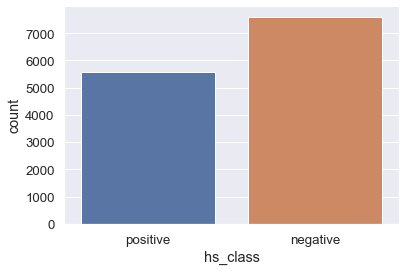

In [10]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df.hs_class) 

In [11]:
df.isna().sum()

hs_class     0
text        36
dtype: int64

In [13]:
df.describe()

,hs_class,text
count,13169,13133
unique,2,12943
top,negative,'
freq,7608,7


In [17]:
df.shape

(13169, 2)

In [18]:
df[["text"]] = df[["text"]].astype('str')

In [19]:
def hapus_kurung(text):
      return re.sub('\[[^]]*\]', '', text)
def hapus_url(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [20]:
nltk.download('stopwords')
stop = set(stopwords.words('indonesian'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
            
    return " ".join(final_text)

In [22]:
def clean_text(text):
    text = hapus_kurung(text)
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = stemmer(text)
    text = remove_stopwords(text)
    return text

In [23]:
df['text'] = df['text'].apply(clean_text)

In [24]:
df.head(100)

,hs_class,text
0,positive,cowok berusaha melacak perhatian gue lanta rem...
1,negative,telat tau eluedan sarap gue bergaul ciga ifla ...
2,negative,kadang berfikir percaya tuhan padah jatuh berk...
3,negative,nku tau matamu sipit diliat
4,positive,kaum cebong kafir dongoknya dungu hahahah
...,...,...
95,positive,jgn salah target ahok agenda utama lengserkan ...
96,positive,kena tagar kepanasan kepo banget
97,negative,maju duit goyang kaki pape duit nak maju kat b...
98,negative,hkbp berdiri pecahnya kristen katolik zaman pe...


**Klasifikasi tweet positif dan negatif**

In [25]:
text = df['text'].values.tolist()
label = df['hs_class'].values

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf_vectorizer = TfidfVectorizer().fit(text)
tfidf_text = tfidf_vectorizer.transform(text)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [30]:
model = SVC().fit(X_train,y_train)

**Report result**

In [19]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      2658
    positive       0.68      0.87      0.76      1293

    accuracy                           0.82      3951
   macro avg       0.80      0.83      0.81      3951
weighted avg       0.84      0.82      0.83      3951



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_svm, y_test)

array([[2117,  541],
       [ 167, 1126]])